In [3]:
cd "/home/enesk/repos/spatial-prediction"

/home/enesk/repos/spatial-prediction


In [4]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import tensorflow as tf
import os
from os import listdir
import datetime
from matplotlib import pyplot as plt
from os.path import isfile, join
import numpy as np

2023-06-14 10:08:14.247448: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
os.environ['CUDA_VISIBLE_DEVICES'] = '' # We don't need a GPU to test the model

In [10]:

from tensorflow.core.util import event_pb2
from tensorflow.python.lib.io import tf_record
from tensorflow.python.util.tf_export import tf_export

tb_dirs = {"20m step, new reward" : "models/RL/2023-06-02--15:28:22/", 
            "5m step, new reward" : "models/RL/2023-06-03--02:47:06/",
            "oracle pretraining" : "models/RL/2023-06-04--02:39:50/",
            "clairevoyante" : "models/RL/2023-06-04--14:30:06/",
            "new_dataset" : "models/RL/2023-06-04--14:12:35/"}

tb_dirs = {"2 UAV" : "models/RL/2023-06-11--22:11:48/", 
            "3 UAV" : "models/RL/2023-06-11--22:11:52/",}

tb_errors = {}
tb_ts= {}

for label, tb_dir in tb_dirs.items():
    tb_file = [tb_dir+f for f in listdir(tb_dir) if isfile(join(tb_dir, f)) if "events" in f][0]

    errors = []
    timestamps = []

    tf_record_iterator = tf_record.tf_record_iterator(tb_file)

    while(1):
        try:
            r = next(tf_record_iterator)
            e = event_pb2.Event.FromString(r)
        except Exception as e:
            print(e)
            break
        for v in e.summary.value:
            if ("Error" in v.tag) and not("Median" in v.tag):
                timestamp = datetime.datetime.utcfromtimestamp(e.wall_time)
                print(timestamp)
                timestamps.append(timestamp)
                errors.append(tf.make_ndarray(v.tensor))

    tb_errors[label] = errors
    tb_ts[label] = [(t1-timestamps[0]) for t1 in timestamps]

2023-06-12 05:30:42.128089
2023-06-12 06:05:57.398228
2023-06-12 06:40:47.293849
2023-06-12 07:10:53.421395
2023-06-12 07:41:02.260196
2023-06-12 08:15:09.847010
2023-06-12 08:44:09.963800
2023-06-12 09:13:42.099886
2023-06-12 09:43:37.502551
2023-06-12 10:12:27.420058
2023-06-12 10:44:05.193800
2023-06-12 11:11:11.598452
2023-06-12 11:41:43.271082
2023-06-12 12:11:46.314439
2023-06-12 12:41:41.403388
2023-06-12 13:11:52.672466
2023-06-12 13:42:29.954037
2023-06-12 14:12:29.773308
2023-06-12 14:42:11.944983
2023-06-12 15:12:17.769403
2023-06-12 15:42:57.327144
2023-06-12 16:14:37.292099
2023-06-12 16:49:57.376608
2023-06-12 17:19:54.400365
2023-06-12 17:49:52.239615
2023-06-12 18:25:39.797545
2023-06-12 19:09:56.619293
2023-06-12 19:41:56.506055
2023-06-12 20:14:33.759554
2023-06-12 20:52:32.661097
2023-06-12 21:30:04.245511
2023-06-12 22:09:47.401124
2023-06-12 22:48:05.670443
2023-06-12 23:27:59.724509
2023-06-13 00:09:43.591115
2023-06-13 00:51:17.445247
2023-06-13 01:31:55.327407
2

(0.0, 25.0)

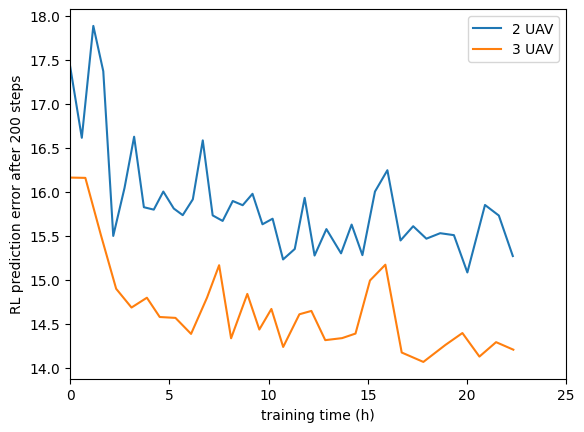

In [15]:
fig, ax = plt.subplots()
for label, tb_dir in tb_dirs.items():
    ax.plot(np.asarray([(t.days*24*3600+t.seconds) for t in tb_ts[label]])/3600, tb_errors[label], label = label)
ax.legend()
ax.set_xlabel("training time (h)")
ax.set_ylabel("RL prediction error after 200 steps")
ax.set_xlim([0,25])

In [ ]:
fig, ax = plt.subplots()
for label in  ["20m step, new reward", "5m step, new reward"]:
    ax.plot(np.asarray([(t.days*24*3600+t.seconds) for t in tb_ts[label]])/3600, tb_errors[label], label = label)
ax.legend()
ax.set_xlabel("training time (h)")
ax.set_ylabel("prediction error")
ax.set_xlim([0,40])